In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en

Dataset URL: https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en
License(s): copyright-authors
100% 983M/987M [00:04<00:00, 260MB/s]
100% 987M/987M [00:04<00:00, 224MB/s]


In [ ]:
!unzip speech-emotion-recognition-en.zip -d speech-emotion-recognition-en

Streaming output truncated to the last 5000 lines.
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_FEA_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_HAP_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_NEU_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_SAD_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_ANG_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_DIS_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_FEA_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_HAP_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_NEU_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_SAD_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_TAI_ANG_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_TAI_DIS_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_TAI_FEA_XX.wav  
  inflating: speech-emotio

In [ ]:
import os

# Dataset folder paths
base_dir = "/content/speech-emotion-recognition-en"
dataset_folders = {
    "Crema": os.path.join(base_dir, "Crema"),
    "Ravdess": os.path.join(base_dir, "Ravdess/audio_speech_actors_01-24"),
    "Savee": os.path.join(base_dir, "Savee"),
    "Tess": os.path.join(base_dir, "Tess")
}

# Label mappings
crema_to_model = {
    "ANG": "angry", "DIS": "disgust", "FEA": "fear",
    "HAP": "happy", "NEU": "neutral", "SAD": "sad"
}

ravdess_code_to_model = {
    "01": "neutral", "03": "happy", "04": "sad",
    "05": "angry", "06": "fear", "07": "disgust", "08": "surprise"
    # skipping calm (02) and song (channel 02)
}

savee_prefix_to_model = {
    "a": "angry", "d": "disgust", "f": "fear",
    "h": "happy", "n": "neutral", "sa": "sad", "su": "surprise"
}

def get_crema_files(path):
    files, labels = [], []
    for file in os.listdir(path):
        if file.endswith(".wav"):
            parts = file.split("_")
            label_code = parts[2]
            label = crema_to_model.get(label_code)
            if label:
                files.append(os.path.join(path, file))
                labels.append(label)
    return files, labels

def get_ravdess_files(path):
    files, labels = [], []
    for actor_folder in os.listdir(path):
        actor_path = os.path.join(path, actor_folder)
        for file in os.listdir(actor_path):
            if file.endswith(".wav"):
                parts = file.split("-")
                if parts[1] != "01":  # skip non-speech
                    continue
                emotion_code = parts[2]
                label = ravdess_code_to_model.get(emotion_code)
                if label:
                    files.append(os.path.join(actor_path, file))
                    labels.append(label)
    return files, labels

def get_savee_files(path):
    files, labels = [], []
    for file in os.listdir(path):
        if file.endswith(".wav"):
            name = file.split(".")[0].lower()
            label = None
            if name.startswith("sa"):
                label = "sad"
            elif name.startswith("su"):
                label = "surprise"
            else:
                label = savee_prefix_to_model.get(name[0])
            if label:
                files.append(os.path.join(path, file))
                labels.append(label)
    return files, labels

def get_tess_files(path):
    files, labels = [], []
    for subfolder in os.listdir(path):
        subfolder_path = os.path.join(path, subfolder)
        for file in os.listdir(subfolder_path):
            if file.endswith(".wav"):
                emotion = subfolder.split("_")[-1].lower()
                if emotion == "pleasant":  # skip folders like "YAF_pleasant_surprised"
                    continue
                label = emotion.replace("surprised", "surprise")
                files.append(os.path.join(subfolder_path, file))
                labels.append(label)
    return files, labels

In [ ]:
!pip install datasets

In [ ]:
import os

# Dataset folder paths
base_dir = "/content/speech-emotion-recognition-en"
dataset_folders = {
    "Crema": os.path.join(base_dir, "Crema"),
    "Ravdess": os.path.join(base_dir, "Ravdess/audio_speech_actors_01-24"),
    "Savee": os.path.join(base_dir, "Savee"),
    "Tess": os.path.join(base_dir, "Tess")
}

# Label mappings
crema_to_model = {
    "ANG": "angry", "DIS": "disgust", "FEA": "fear",
    "HAP": "happy", "NEU": "neutral", "SAD": "sad"
}

ravdess_code_to_model = {
    "01": "neutral", "03": "happy", "04": "sad",
    "05": "angry", "06": "fear", "07": "disgust", "08": "surprise"
    # skipping calm (02) and song (channel 02)
}

savee_prefix_to_model = {
    "a": "angry", "d": "disgust", "f": "fear",
    "h": "happy", "n": "neutral", "sa": "sad", "su": "surprise"
}

def get_crema_files(path):
    files, labels = [], []
    for file in os.listdir(path):
        if file.endswith(".wav"):
            parts = file.split("_")
            label_code = parts[2]
            label = crema_to_model.get(label_code)
            if label:
                files.append(os.path.join(path, file))
                labels.append(label)
    return files, labels

def get_ravdess_files(path):
    files, labels = [], []
    for actor_folder in os.listdir(path):
        actor_path = os.path.join(path, actor_folder)
        for file in os.listdir(actor_path):
            if file.endswith(".wav"):
                parts = file.split("-")
                if parts[1] != "01":  # skip non-speech
                    continue
                emotion_code = parts[2]
                label = ravdess_code_to_model.get(emotion_code)
                if label:
                    files.append(os.path.join(actor_path, file))
                    labels.append(label)
    return files, labels

def get_savee_files(path):
    files, labels = [], []
    for file in os.listdir(path):
        if file.endswith(".wav"):
            name = file.split(".")[0].lower()
            label = None
            if name.startswith("sa"):
                label = "sad"
            elif name.startswith("su"):
                label = "surprise"
            else:
                label = savee_prefix_to_model.get(name[0])
            if label:
                files.append(os.path.join(path, file))
                labels.append(label)
    return files, labels

def get_tess_files(path):
    files, labels = [], []
    for subfolder in os.listdir(path):
        subfolder_path = os.path.join(path, subfolder)
        for file in os.listdir(subfolder_path):
            if file.endswith(".wav"):
                emotion = subfolder.split("_")[-1].lower()
                if emotion == "pleasant":  # skip folders like "YAF_pleasant_surprised"
                    continue
                label = emotion.replace("surprised", "surprise")
                files.append(os.path.join(subfolder_path, file))
                labels.append(label)
    return files, labels

In [ ]:
all_files, all_labels = [], []

for name, path in dataset_folders.items():
    if name == "Crema":
        files, labels = get_crema_files(path)
    elif name == "Ravdess":
        files, labels = get_ravdess_files(path)
    elif name == "Savee":
        files, labels = get_savee_files(path)
    elif name == "Tess":
        files, labels = get_tess_files(path)
    print(f"{name} | Loaded: {len(files)} files")
    all_files.extend(files)
    all_labels.extend(labels)

print(f"Total: {len(all_files)} files loaded.")

Crema | Loaded: 7442 files
Ravdess | Loaded: 1248 files
Savee | Loaded: 120 files
Tess | Loaded: 2800 files
Total: 11610 files loaded.


In [ ]:
# # TAKING A SUBSET
# from sklearn.model_selection import train_test_split

# # Zip and shuffle
# import random
# combined = list(zip(all_files, all_labels))
# random.shuffle(combined)

# subset = combined[:4000]

# # Unzip into separate lists
# subset_files, subset_labels = zip(*subset)

# # Step 4: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     subset_files, subset_labels, test_size=0.2, stratify=subset_labels, random_state=42
# )

from sklearn.model_selection import train_test_split

# Final label list
unique_labels = set(all_labels)
print("Labels:", unique_labels)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    all_files, all_labels,
    test_size=0.2,
    stratify=all_labels,
    random_state=42
)

print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Labels: {'angry', 'disgust', 'sad', 'fear', 'happy', 'neutral', 'surprise'}
Train: 9288, Test: 2322


In [ ]:
print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 9288, Test: 2322


In [ ]:
import librosa
print(librosa.__version__)

0.11.0


In [ ]:
import librosa
import numpy as np
from tqdm import tqdm
from librosa.feature import mfcc as librosa_mfcc

def extract_features(file_list, max_len=174):
    features = []
    for file in tqdm(file_list):
        try:
            signal, sr = librosa.load(file, sr=22050)
            mfcc = librosa_mfcc(y=signal, sr=sr, n_mfcc=40)
            mfcc = mfcc.T  # shape: (time, features)

            # Pad or truncate
            if len(mfcc) < max_len:
                pad_width = max_len - len(mfcc)
                mfcc = np.pad(mfcc, pad_width=((0, pad_width), (0, 0)), mode='constant')
            else:
                mfcc = mfcc[:max_len]

            features.append(mfcc)
        except Exception as e:
            print(f"Error processing {file}: {e}")
            continue

    return np.array(features)

# Extract MFCC features
X_train_mfcc = extract_features(X_train)
X_test_mfcc = extract_features(X_test)

# Encode labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_train_encoded = to_categorical(encoder.fit_transform(y_train))
y_test_encoded = to_categorical(encoder.transform(y_test))

100%|██████████| 2322/2322 [00:30<00:00, 75.46it/s] 


In [ ]:
print("X_train_mfcc shape:", X_train_mfcc.shape)
print("X_test_mfcc shape:", X_test_mfcc.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

X_train_mfcc shape: (9288, 174, 40)
X_test_mfcc shape: (2322, 174, 40)
y_train_encoded shape: (9288, 7)
y_test_encoded shape: (2322, 7)


In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence

def data_collator(features):
    input_values = [torch.tensor(f["input_values"]) for f in features]
    input_values = pad_sequence(input_values, batch_first=True)

    labels = torch.tensor([f["label"] for f in features])

    return {
        "input_values": input_values,
        "labels": labels
    }

In [ ]:
!pip install datasets

### Base Model

In [ ]:
!pip install evaluate
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.5 MB/s eta 0:00:00


In [ ]:
# ✅ Evaluate base model before fine-tuning
print("🔍 Evaluating base Wav2Vec2 model BEFORE fine-tuning...")

# Clone the model freshly to ensure it's not trained yet
base_model = Wav2Vec2ForSequenceClassification.from_pretrained(
    "facebook/wav2vec2-base",
    num_labels=len(label_encoder.classes_),
    problem_type="single_label_classification"
).to(device)
base_model.config.label2id = label2id
base_model.config.id2label = id2label

# Training setup
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=9,
    learning_rate=2e-5,
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
)

# Evaluate (same setup but no training)
base_trainer = Trainer(
    model=base_model,
    args=training_args,
    eval_dataset=test_data,
    compute_metrics=compute_metrics,
    tokenizer=processor,
    data_collator=data_collator,
)

base_predictions = base_trainer.predict(test_data)
print("🧪 Base Model Accuracy (before fine-tuning):", base_predictions.metrics["test_accuracy"])
print(classification_report(y_test_encoded, np.argmax(base_predictions.predictions, axis=1), target_names=label_encoder.classes_))

🔍 Evaluating base Wav2Vec2 model BEFORE fine-tuning...


Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-40-91175a4c82dc>:30: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  base_trainer = Trainer(


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: haniarouby (haniarubyruby) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


🧪 Base Model Accuracy (before fine-tuning): 0.10378983634797588
              precision    recall  f1-score   support

       angry       0.14      0.29      0.19       373
     disgust       0.50      0.02      0.04       396
        fear       0.12      0.01      0.02       372
       happy       0.00      0.00      0.00       373
     neutral       0.17      0.32      0.22       317
         sad       0.25      0.00      0.01       373
    surprise       0.02      0.15      0.04       118

    accuracy                           0.10      2322
   macro avg       0.17      0.11      0.07      2322
weighted avg       0.19      0.10      0.07      2322



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


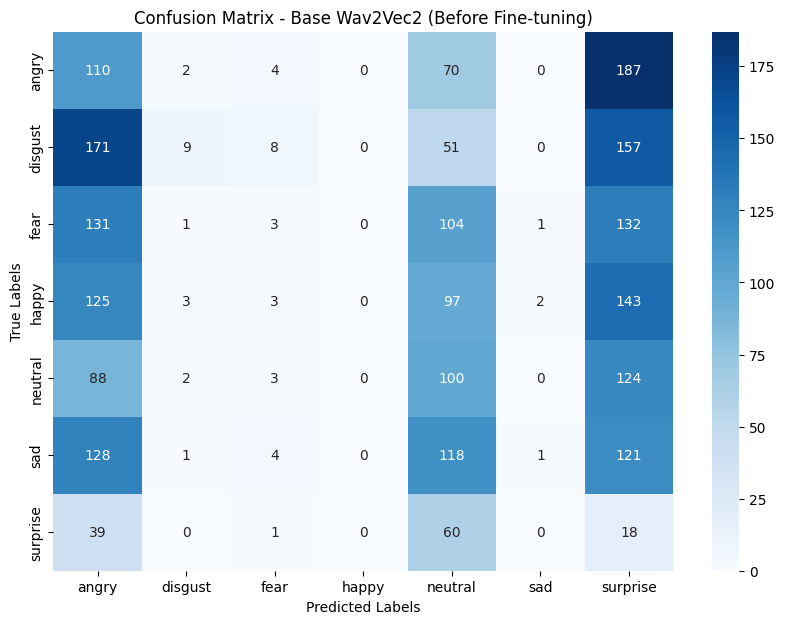

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = y_test_encoded
y_pred = np.argmax(base_predictions.predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Base Wav2Vec2 (Before Fine-tuning)')
plt.show()

### Finetuned Model

In [ ]:
import os
import torch
import librosa
import numpy as np
from datasets import Dataset
from transformers import Wav2Vec2ForSequenceClassification, Wav2Vec2Processor, Wav2Vec2Model, TrainingArguments, Trainer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from transformers import Wav2Vec2FeatureExtractor

# ✅ Load the model and processor
model_name = "facebook/wav2vec2-base"
processor = Wav2Vec2Processor.from_pretrained(model_name)
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
model = Wav2Vec2ForSequenceClassification.from_pretrained(
    "facebook/wav2vec2-base",
    num_labels=len(encoder.classes_),
    problem_type="single_label_classification"
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
label2id = {l: i for i, l in enumerate(label_encoder.classes_)}
id2label = {i: l for l, i in label2id.items()}
model.config.label2id = label2id
model.config.id2label = id2label

# Helper: preprocess audio
def preprocess(batch):
    speech_array, _ = librosa.load(batch["file"], sr=16000)
    inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    inputs["label"] = batch["label"]
    return {k: v.squeeze(0) if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:312: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Prepare dataset
train_data = Dataset.from_dict({"file": X_train, "label": y_train_encoded})
test_data = Dataset.from_dict({"file": X_test, "label": y_test_encoded})
train_data = train_data.map(preprocess)
test_data = test_data.map(preprocess)

# Define metrics
def compute_metrics(pred):
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(pred.label_ids, preds)
    return {"accuracy": acc}

Map:   0%|          | 0/9288 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Map:   0%|          | 0/2322 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=9,
    learning_rate=2e-5,
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    compute_metrics=compute_metrics,
    tokenizer=processor,
    data_collator=data_collator,

)

trainer.train()

# Evaluate
predictions = trainer.predict(test_data)
print("Accuracy:", predictions.metrics["test_accuracy"])
print(classification_report(y_test_encoded, np.argmax(predictions.predictions, axis=1), target_names=label_encoder.classes_))

<ipython-input-13-0f91a5ce62fa>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: haniaruby (haniaruby-helwan-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,0.943300,0.744892,0.759690
2,0.672600,0.591029,0.804479
3,0.559800,0.639914,0.800603
4,0.583800,0.723133,0.818691
5,0.268300,0.768859,0.834195


Epoch,Training Loss,Validation Loss,Accuracy
1,0.943300,0.744892,0.759690
2,0.672600,0.591029,0.804479
3,0.559800,0.639914,0.800603
4,0.583800,0.723133,0.818691
5,0.268300,0.768859,0.834195
6,0.139000,0.849313,0.835487
7,0.212500,0.971416,0.829888
8,0.188000,0.928241,0.844100


Accuracy: 0.8440999138673557
              precision    recall  f1-score   support

       angry       0.86      0.93      0.89       373
     disgust       0.84      0.81      0.82       396
        fear       0.82      0.78      0.80       372
       happy       0.88      0.82      0.85       373
     neutral       0.82      0.95      0.88       317
         sad       0.80      0.77      0.78       373
    surprise       0.98      0.96      0.97       118

    accuracy                           0.84      2322
   macro avg       0.86      0.86      0.86      2322
weighted avg       0.84      0.84      0.84      2322



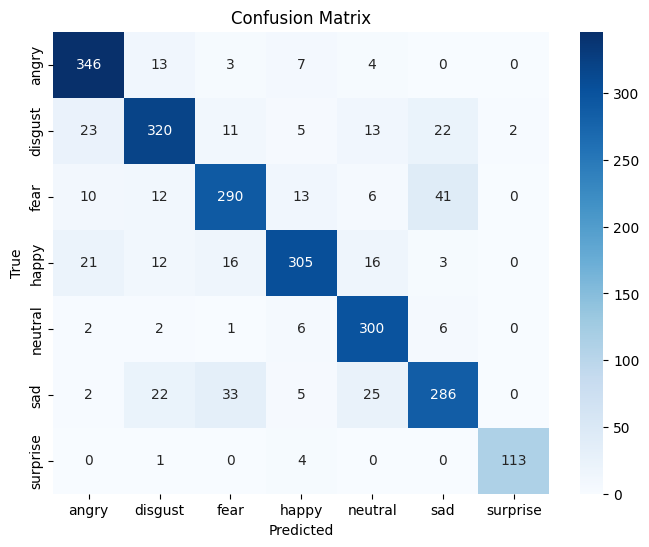

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(predictions.predictions, axis=1)

cm = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


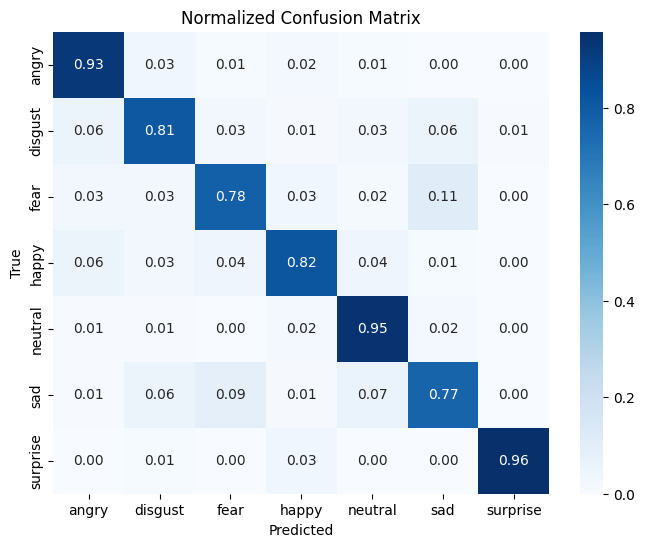

In [ ]:
cm_normalized = confusion_matrix(y_test_encoded, y_pred, normalize="true")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix")
plt.show()


#### Addressing Class Imbalance

In [ ]:
from transformers import Trainer
import torch
from torch.nn import CrossEntropyLoss

class WeightedTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights.to(self.args.device)

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Use weighted loss
        loss_fct = CrossEntropyLoss(weight=self.class_weights)
        loss = loss_fct(logits, labels)

        return (loss, outputs) if return_outputs else loss

In [ ]:
import numpy as np
import torch
from sklearn.utils.class_weight import compute_class_weight

all_labels = train_data["label"]
num_classes = len(set(all_labels))

class_weights = compute_class_weight(class_weight='balanced', classes=np.arange(num_classes), y=all_labels)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

In [ ]:
from transformers import Trainer
import torch
from torch.nn import CrossEntropyLoss

class WeightedTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights.to(self.args.device)

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        loss_fct = CrossEntropyLoss(weight=self.class_weights)
        loss = loss_fct(logits, labels)

        return (loss, outputs) if return_outputs else loss

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=9,
    learning_rate=2e-5,
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
)

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    compute_metrics=compute_metrics,
    tokenizer=processor,
    data_collator=data_collator,
    class_weights=class_weights_tensor,
)

trainer.train()

predictions = trainer.predict(test_data)
print("Accuracy:", predictions.metrics["test_accuracy"])
print(classification_report(y_test_encoded, np.argmax(predictions.predictions, axis=1), target_names=label_encoder.classes_))


<ipython-input-39-5c8ee22a1428>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: haniarouby (haniarubyruby) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,0.678600,0.790591,0.708872
2,0.761900,0.653006,0.768734
3,0.411000,0.679491,0.785099
4,0.291700,0.633386,0.807063
5,0.303200,0.672198,0.835056
6,0.259200,0.769220,0.827304
7,0.057300,0.714929,0.851852
8,0.018300,0.774358,0.850560
9,0.073900,0.810101,0.848837


Accuracy: 0.8518518518518519
              precision    recall  f1-score   support

       angry       0.89      0.94      0.91       373
     disgust       0.80      0.89      0.84       396
        fear       0.81      0.80      0.81       372
       happy       0.91      0.83      0.87       373
     neutral       0.90      0.88      0.89       317
         sad       0.79      0.74      0.77       373
    surprise       0.93      0.96      0.95       118

    accuracy                           0.85      2322
   macro avg       0.86      0.86      0.86      2322
weighted avg       0.85      0.85      0.85      2322



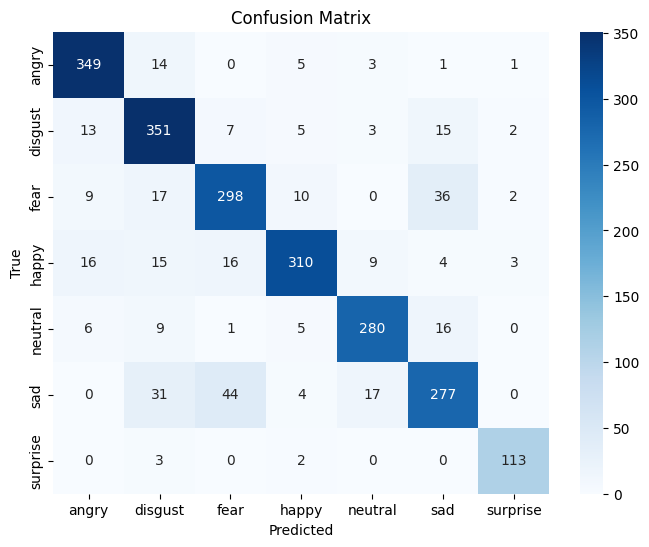

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = np.argmax(predictions.predictions, axis=1)

cm = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

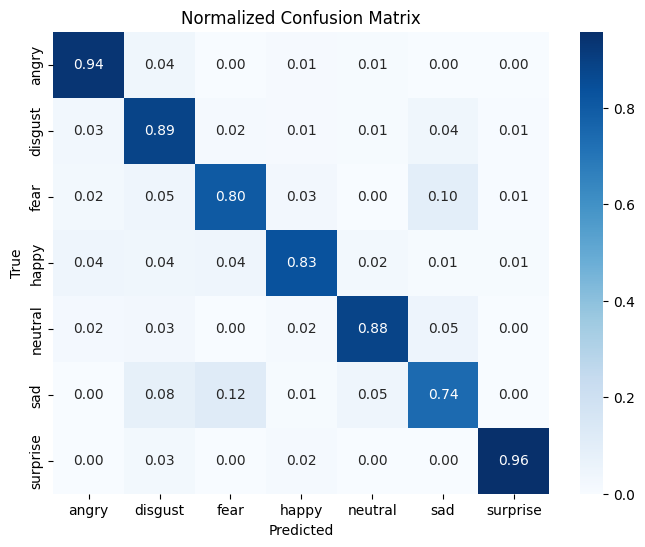

In [ ]:
cm_normalized = confusion_matrix(y_test_encoded, y_pred, normalize="true")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix")
plt.show()